# Imports

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# Dataset: MNIST Digits

## Load data

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()

images = digits.images
Y = digits.target
labels = digits.target_names

print("images shape ", images.shape)
print("Y ", Y.shape)
print("labels are ", labels)

images shape  (1797, 8, 8)
Y  (1797,)
labels are  [0 1 2 3 4 5 6 7 8 9]


## Preprocess data

In [2]:
X = images.reshape([images.shape[0], -1])
print(X.shape)

print(Y.shape)

(1797, 64)
(1797,)


## Train-test spilt

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print("X train shape", X_train.shape)
print("Y train shape ", Y_train.shape)

print("X_test shape ", X_test.shape)
print("Y_test shape", Y_test.shape)


X train shape (1347, 64)
Y train shape  (1347,)
X_test shape  (450, 64)
Y_test shape (450,)


# Visualise in low dimension: Isomap


```python

Isomap(
    n_neighbors=5,
    n_components=2,
    eigen_solver='auto',
    tol=0,
    max_iter=None,
    path_method='auto',
    neighbors_algorithm='auto',
    n_jobs=None,
    metric='minkowski',
    p=2,
    metric_params=None,
)

```

## Convert to 2 dimensional form: Train

In [4]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(X)

Isomap(eigen_solver='auto', max_iter=None, metric='minkowski',
       metric_params=None, n_components=2, n_jobs=None, n_neighbors=5,
       neighbors_algorithm='auto', p=2, path_method='auto', tol=0)

## Convert to 2 dimensional from trained

In [5]:
X_2D = iso.transform(X)
print("transform shape ", X_2D.shape)

transform shape  (1797, 2)


## Visualise the 2D data: feature1 and feature2

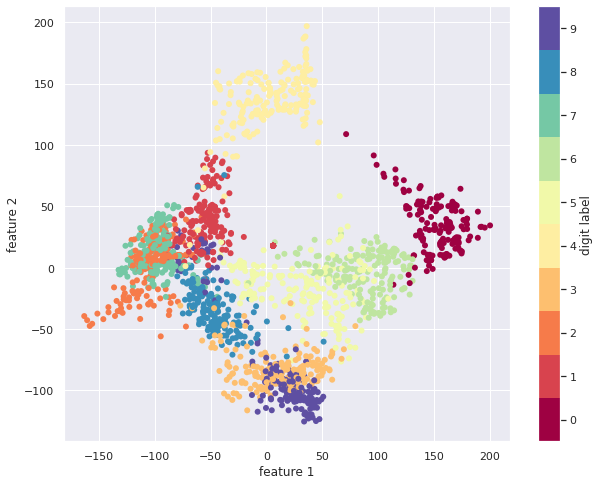

In [8]:
plt.figure(figsize=(10, 8))

plt.scatter(X_2D[:, 0],
            X_2D[:, 1],
            c=Y,
            edgecolors='none',
            cmap=plt.cm.get_cmap('Spectral', 10))

plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

# Classification: Gaussian Naive Bayes

## Train the model

In [10]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Test the model

In [11]:
Y_pred = model.predict(X_test)
Y_pred_train = model.predict(X_train)
print(np.unique(Y_pred))

[0 1 2 3 4 5 6 7 8 9]


## Accuracy

In [13]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(Y_train, Y_pred_train)
print("train acc ", train_acc)

test_acc = accuracy_score(Y_test, Y_pred)
print("test accuracy of model ", test_acc)

train acc  0.8225686711210096
test accuracy of model  0.7911111111111111


## Confusion matrix

9.5 0.5


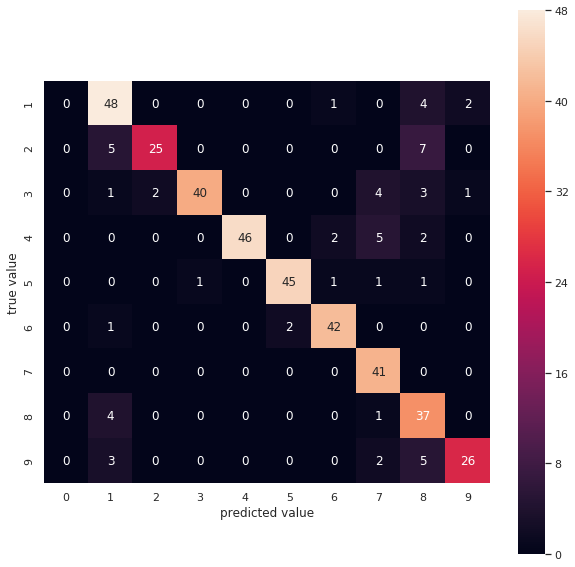

In [69]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize= [10,10])
sns.heatmap(mat, annot= True, square= True, cbar = True)

#fix for cut out plot-- increase the ylim
b,t = plt.ylim()
print(b,t)
b += 0.5
t += 0.5
plt.ylim(b,t)

plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()

## image plot visualisation

In [71]:
def initialise_axes(h,w):
    fig, axes = plt.subplots(h,w, figsize = (8,8))
    return fig, axes

```python
ax.text(x, y, s, fontdict=None, withdash=<deprecated parameter>, **kwargs)
```

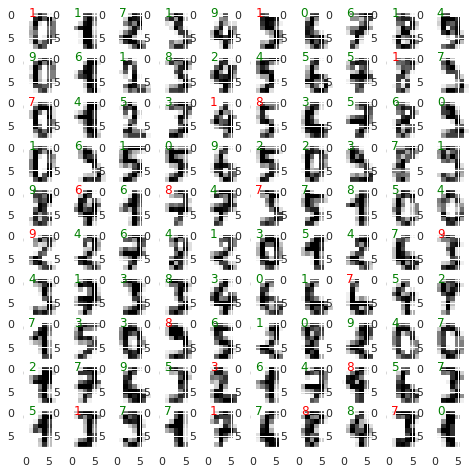

In [77]:
fig, axes = initialise_axes(10, 10)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='binary', interpolation='nearest')

    ax.text(
        0.5,
        0.5,
        str(Y_pred[i]),
        color = 'green' if (Y_pred[i] == Y_test[i]) else 'red'
    )